# Purpose

This Notebook demonstrates use of the `imzml_file.py` module in `Bastet` (a.k.a. `openmsi-tk`).  The module is used to convert a `*.imzML` file into a structure (datacube and associated metadata) that can be added to OpenMSI.  

### Current limitations:
- Only continuous-mode imzML is supported: every scan in the imzML file must have the same m/z axis.  If not, import will fail.
- Only single-scan types per file: Because of the authors' inability (despite several attempts) to get any published `*.imzML` converter to work, we have not be unable to study the structure of imzML files that contain multiple scan types (e.g. both MS1 and MS2 scans, or MS2 scans with different precursors or different dissociation energies)

### Acknowledgements:
- The `imzml_file.py` depends on the `pyimzml` module developed by Alexandrov Team at EMBL Heidelberg for reading `*.imzML` data into python.  Thanks to them for making their code freely available.  Find it at:
    - Github: https://github.com/pyIMS/pyimzML
    - Pipy: https://pypi.python.org/pypi/pyimzML

In [1]:
# Basic packages
import numpy as np
import os
import sys
import re
import time

# Plotting
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Terminal-specific path definitions for finding data
def isneeded(x):
    if x not in sys.path:
        sys.path.append(x)

isneeded('/Users/curt/openMSI_SVN/openmsi-tk/')
isneeded('/Users/curt/openMSI_localdata/')

# Use openmsi-tk / bastet code for imzML parsing
from omsi.dataformat.imzml_file import *

In [2]:
# Function to find most intense pixel and most intense m/z, 
#  will only plot if matplotlib is already imported
def plotMostIntense(cube, mzvec):
    """
    cube is a 3D numpy array with dimensions x, y, and m/z
    mzvec is a vector of same length as cube.shape[2]
    """
    mxx, mxy = np.unravel_index(cube[:, :, :].sum(axis=2).argmax(), dims=cube.shape[:-1])
    mxmz = cube[:, :, :].sum(axis=(0, 1)).argmax()
    f, ax = plt.subplots(1, 2)
    ax[0].plot(mzvec, cube[mxx, mxy, :])
    ax[0].set_title('spectrum for pixel ' + str(mxx) + ', ' + str(mxy))
    
    ax[1].imshow(cube[:, :, mxmz], interpolation='none', cmap=cm.Greys_r)
    ax[1].set_title('image for m/z ' + str(mzvec[mxmz]))
    return mxx, mxy, mxmz


### Examples of successful import of continuous mode data
The test files used here were obtained from the MALDI-MSI.org web site via http://maldi-msi.org/index.php?option=com_content&view=article&id=186&Itemid=68

Read 9 scans from imzML file.
Datacube shape is [(3, 3, 8399)]
Parsing file /Users/curt/openMSI_localdata/imzml/example_files/Example_Continuous.imzML took 0.055330991745 seconds.


(2, 2, 636)

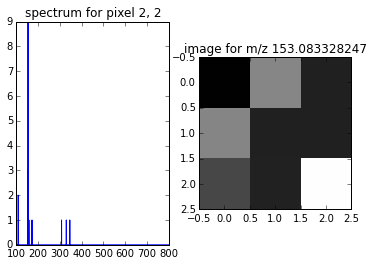

In [3]:
# Reading tiny example file
fname = '/Users/curt/openMSI_localdata/imzml/example_files/Example_Continuous.imzML'
start = time.time()
ec = imzml_file(basename=fname)
stop = time.time()
print 'Parsing file %s took %s seconds.' % (fname, stop-start)
plotMostIntense(ec.data, ec.mz_all)

Read 16200 scans from imzML file.
Datacube shape is [(180, 90, 300)]
Parsing file /Users/curt/openMSI_localdata/imzml/s042_continuous/S042_Continuous.imzML took 34.8928630352 seconds.


(28, 1, 72)

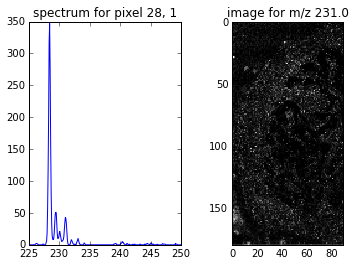

In [4]:
# Reading "real" example file
fname = '/Users/curt/openMSI_localdata/imzml/s042_continuous/S042_Continuous.imzML'
start = time.time()
s42c = imzml_file(basename=fname)
stop = time.time()
print 'Parsing file %s took %s seconds.' % (fname, stop-start)
plotMostIntense(s42c.data, s42c.mz_all)

### Examples of poor results with "processed" mode imzML
The test files used here were obtained from the MALDI-MSI.org web site via http://maldi-msi.org/index.php?option=com_content&view=article&id=186&Itemid=68.

Because processed mode is not supported in general, imports will likely fail.  If processed mode spectra still have a common m/z axis for each scan, however, import will work.  But this is not guaranteed in general and given the design goals of processed mode is very unlikely.

Read 9 scans from imzML file.
Datacube shape is [(3, 3, 8399)]
Parsing file /Users/curt/openMSI_localdata/imzml/example_files/Example_Processed.imzML took 0.066465139389 seconds.


(2, 2, 636)

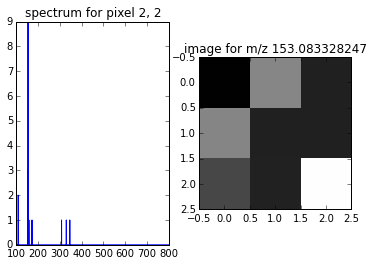

In [5]:
# Reading "tiny" example processed-mode file: this works
fname = '/Users/curt/openMSI_localdata/imzml/example_files/Example_Processed.imzML'
start = time.time()
ep = imzml_file(basename=fname)
stop = time.time()
print 'Parsing file %s took %s seconds.' % (fname, stop-start)
plotMostIntense(ep.data, ep.mz_all)

In [6]:
# Reading "tiny" example processed-mode file: this does not work
fname = '/Users/curt/openMSI_localdata/imzml/s043_processed/S043_Processed.imzML'
start = time.time()
s43p = imzml_file(basename=fname)
stop = time.time()
print 'Parsing file %s took %s seconds.' % (fname, stop-start)

# plotMostIntense(s43p.data, s43p.mz_all)

Read 27125 scans from imzML file.
Inconsistent m/z axis from scan to scan.  Currently OpenMSI supports only continuous-mode imzML.


AttributeError: 